# ADIAB_WAVE TESTCASE

This notebook shows how to plot the vertical cross-section of the Stokes drift, the quasi-Eulerian velocity and the Lagrangian velocity for the ADIAB_WAVE test case experiment. This allow you to compare your results with Ardhuin et al (2008) and Bennis et al. (2011). The results exhibit a vertical shear in the Lagrangian velocity that is entirely due to the Stokes drift. The quasi-Eulerian velocity is irrotational and homogeneous over the water column. The Stokes drift divergence is compensated by a strong convergence in the quasi-Eulerian velocity.


In [13]:
import netCDF4 as nc4
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
font = {'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)

In [14]:
# netcdf file
exp_name  = 'EXP00'
file_name =  f'../{exp_name}/ADIAB_GLM_grid_U.nc'
tind = 899
ncfile = Dataset(file_name, mode='r')

In [15]:
# read variables
depth=ncfile.variables['e3u_inst'][tind,0:119,2,1:76].squeeze()
depth=np.cumsum(depth,0)
nav=ncfile.variables['nav_lon'][2, 1:76]
nav=np.tile(nav,(np.size(depth,0),1))
us=ncfile.variables['sdzocrtx'][tind, 0:119 ,2 , 1:76]
u=ncfile.variables['uo_inst'][tind, 0:119 ,2 , 1:76]
ncfile.close()

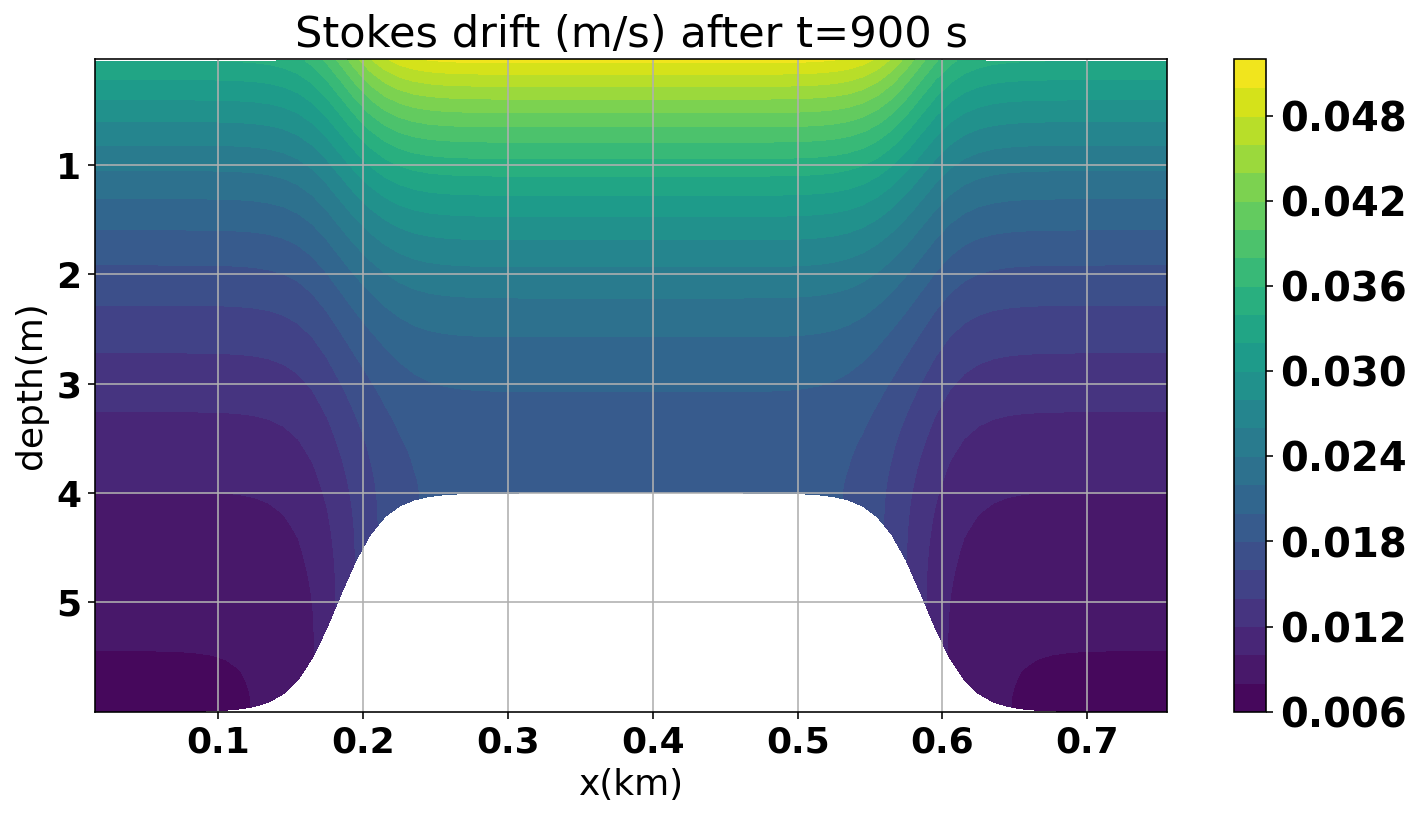

In [16]:
# Figure Stokes drift (Us)
fig, ax = plt.subplots(figsize=(12,6))
level=np.arange(0.006,0.054, 0.002 )
CS = ax.contourf(nav,depth,us,level)
cbar=fig.colorbar(CS)
cbar.ax.tick_params(labelsize=20)
ax.set_title('Stokes drift (m/s) after t=%s s'%(tind+1))
ax.invert_yaxis()
plt.ylabel('depth(m)')
plt.xlabel('x(km)')
plt.grid(True)
plt.show()

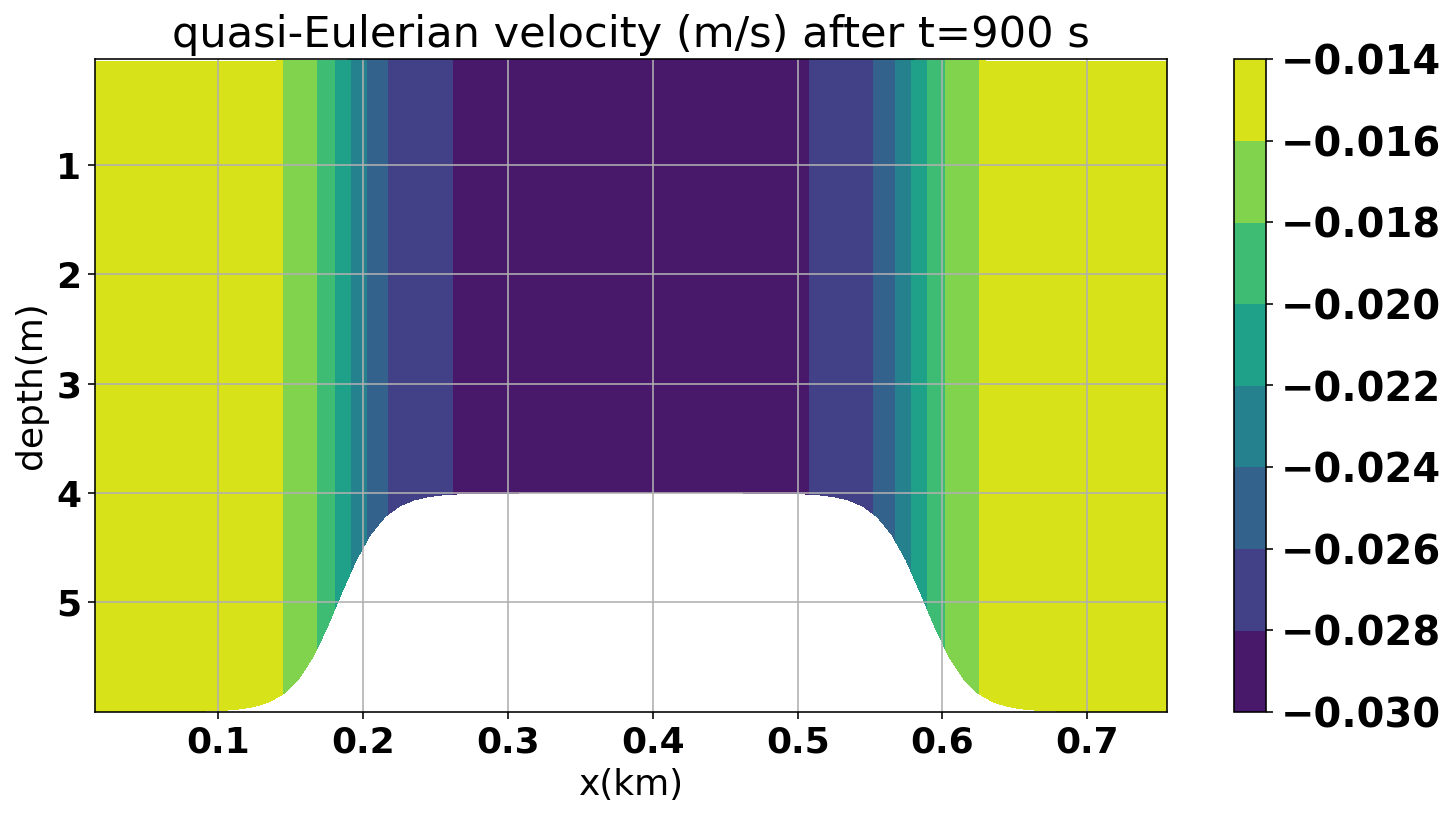

In [17]:
# Figure quasi-Eulerian velocity (U)
fig, ax = plt.subplots(figsize=(12,6))
CS = ax.contourf(nav,depth,u)
cbar=fig.colorbar(CS)
cbar.ax.tick_params(labelsize=20)
ax.set_title('quasi-Eulerian velocity (m/s) after t=%s s'%(tind+1))
ax.invert_yaxis()
plt.ylabel('depth(m)')
plt.xlabel('x(km)')
plt.grid(True)
plt.show()

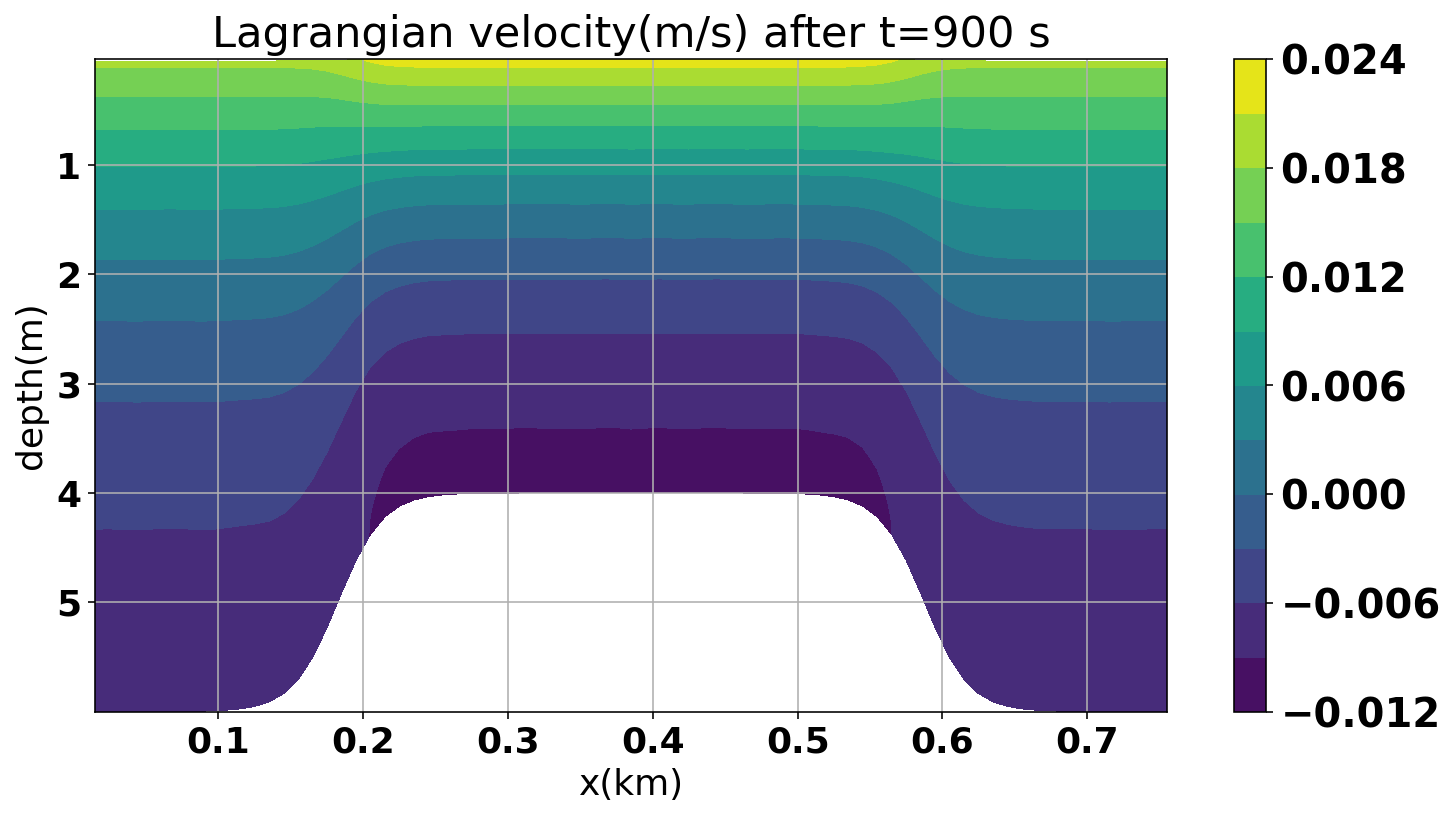

In [18]:
# Figure Lagrangian velocity (UL=U+Us)
fig, ax = plt.subplots(figsize=(12,6))
CS = ax.contourf(nav,depth,u+us,10)
cbar=fig.colorbar(CS)
cbar.ax.tick_params(labelsize=20)
ax.set_title('Lagrangian velocity(m/s) after t=%s s'%(tind+1))
ax.invert_yaxis()
plt.ylabel('depth(m)')
plt.xlabel('x(km)')
plt.grid(True)
plt.show()